### About global temperature change
According to a continuous study conducted by the NASA’s Goddard institute, the Earth’s average global temperature has risen by 0.8 degrees Celsius or 1.4 degrees Fahrenheit since 1880. Since the beginning of the Industrial Revolution, the thermometer readings have risen continuously. Scientists have measured global temperatures for over a hundred years and see that the Earth is getting hotter. The trend can be best visualized by comparing each year’s average temperature with the long-term average. 
### Some information about Athens climate
In Athens, the capital of Greece, the climate is Mediterranean, with mild, moderately rainy winters and hot, sunny summers. The city is located near the 38th parallel, but in winter, from December to mid-March, it's sometimes subject to outbreaks of cold air from the Balkan Peninsula, which can bring cold and rain for some days, and sometimes even snow. Snowfalls occur more easily in the northern part of the city; at the city center, the Acropolis is whitened with snow more easily than the lower surrounding areas; a particularly abundant snowfall, which also affected the southern and coastal areas, occurred in February 2008.
Summer is hot and sunny; in fact, Athens in summer is the hottest capital of Europe. In July and August, the temperature quite easily reaches 35/36 °C (95/97 °F), but it can sometimes reach as high as 40 °C (104 °F).

### Abstract
In this project, we have analyzed local temperature of Athens, Greece in accordance with the
global temperature data and compared. We will compare the global temperature with the temperature of my city, Athens. In order to do the analysis we need to export the data from the SQL database that exist in the platform. We have been provided with a database on Udacity portal from where I have to extract, manipulate and visualize the data as in the following goals.Data extraction has been done by writing SQL queries then exported to CSV. For this project, I will use Python and jupyter notebook

### Steps that we followed
<ol>
<li>Extraction of data from the database and export to CSV file</li>
<li>Making a chart visualization based on extracted data</li>
<li>Observations</li>
</ol>

### The Database Schema
There are three tables in the database:
* city_list - This contains a list of cities and countries in the database.
* city_data - This contains the average temperatures for each city by year (&#8451;).
* global_data - This contains the average global temperatures by year (&#8451;).

I first did a research in schema of the database with the following queries:

* <b>  Get the global annual temp </b>
<br>SELECT * 
<br>FROM global_data

* <b> Extract a csv file that I named results_global.csv </b>
<br>

* <b>  Get the local annual temp </b>
<br>SELECT *
<br>FROM city_data
<br>WHERE city LIKE 'Athens';
* <b> This way we extract a csv file with Athens temperature per year.

The libraries that helped with our research and visualisation are: 
* Pandas for loading the dataset in jupyter notebook
* Numpy
* Matplotlib for visualizing the line chart

In [69]:
import pandas as pd
import matplotlib.pyplot as plt #for making line chart
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

### Explore the dataset
We extract the first 10 rows of the dataset.
<br>In order to do the analysis 2 datasets where used. 
<br>One for the Global temperatures and one for Athens temperatures.

In [32]:
#We first read the global temperature dataset
df_global = pd.read_csv("results_global.csv")
df_global.columns
df_global.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [35]:
#We store the Athens dataset as df_local
df_local = pd.read_csv("athens.csv", sep=',', index_col=False)
df_local.head(10)

,year,city,country,avg_temp
0,1753,Athens,Greece,17.35
1,1754,Athens,Greece,17.47
2,1755,Athens,Greece,17.22
3,1756,Athens,Greece,17.92
4,1757,Athens,Greece,17.68
5,1758,Athens,Greece,16.07
6,1759,Athens,Greece,17.11
7,1760,Athens,Greece,16.61
8,1761,Athens,Greece,17.65
9,1762,Athens,Greece,17.55


We can make two different simple scatterplots in order to visualize our data before the line chart and the moving average method

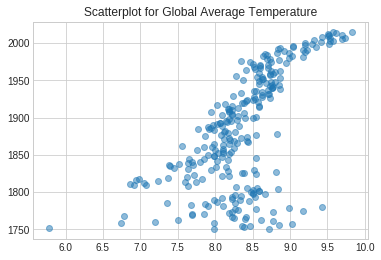

In [101]:
x = df_global['avg_temp']
y = df_global['year']
plt.title('Scatterplot for Global Average Temperature')
plt.scatter(x, y, alpha=0.5);
plt.show(block=True);

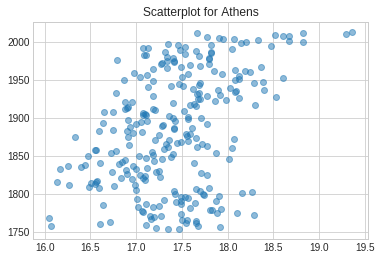

In [100]:
x = df_local['avg_temp']
y = df_local['year']
plt.scatter(x, y, alpha=0.5);
plt.title('Scatterplot for Athens')
plt.show(block=True);

We explore our data by finding the means, the mins and the maxs of the Athens and global temperature.

In [60]:
print("The Average Athens temp is:", df_local['avg_temp'].mean())
print("The Average Global temp is:", df_global['avg_temp'].mean())

The Average Athens temp is: 17.421839080459772
The Average Global temp is: 8.36947368421053


In [62]:
print("The lowest Athens average temp is:", df_local['avg_temp'].min())
print("The lowest average global temp is:",df_global['avg_temp'].min())

The lowest Athens average temp is: 16.05
The lowest average global temp is: 5.78


In [107]:
print("The highest Athens average temp is:", df_local['avg_temp'].max())
print("The highest average global temp is:",df_global['avg_temp'].max()) 

The highest Athens average temp is: 19.36
The highest average global temp is: 9.83


In [152]:
#lowest average temperature on global dataset
print(df_global.iloc[2])

year        1752.00
avg_temp       5.78
Name: 2, dtype: float64


In [156]:
#lowest average temperature on Athens dataset
print(df_local.iloc[15])

year          1768
city        Athens
country     Greece
avg_temp     16.05
Name: 15, dtype: object


In [153]:
#Highest average temperature on Athens dataset
print(df_local.iloc[260])

year          2013
city        Athens
country     Greece
avg_temp     19.36
Name: 260, dtype: object


In [140]:
#Highest average temperature on global dataset
print(df_global.iloc[265])

year        2015.00
avg_temp       9.83
Name: 265, dtype: float64


### Merge data in one dataset
We will do an inner join to merge only temp value prensent in both dataset.

In [64]:
df_all = df_global.merge(df_local, left_on='year', right_on='year', how='inner')
df_all.head(3)

,year,avg_temp_x,city,country,avg_temp_y
0,1753,8.39,Athens,Greece,17.35
1,1754,8.47,Athens,Greece,17.47
2,1755,8.36,Athens,Greece,17.22


We will change the column names to <b>GAT</b> for <b>Average Global Temp</b> and <B>AAT</B> for <b>Average Global Temp</b>

In [65]:
df_all = df_all.rename(columns={"avg_temp_x": "GAT","avg_temp_y" : "AAT"})
df_all.head()

,year,GAT,city,country,AAT
0,1753,8.39,Athens,Greece,17.35
1,1754,8.47,Athens,Greece,17.47
2,1755,8.36,Athens,Greece,17.22
3,1756,8.85,Athens,Greece,17.92
4,1757,9.02,Athens,Greece,17.68


## Moving average
In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. Moving averages are used to smooth out data to make it easier to observe long term trends and not get lost in daily fluctuations. For example, let's say you wanted to visualize the sales trend at a clothing retail store. You start with daily data, and your chart looks too volatile to interpret because more people shop on the weekends, so sales spike on those days. In a visualization like this it's really importan to calculate the moving averages before we extract our line chart. In Python, moving average could be computed with Pandas rolling function. This step is very important in order to get a good result of our data.

In [67]:
df_all['global_ma'] = df_all['GAT'].rolling(window=20).mean()
df_all['local_ma'] = df_all['AAT'].rolling(window=20).mean()

## Visualisation for global temperature
We plot the global average Temperature in a line plot made with matplotlib. 
<br>Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

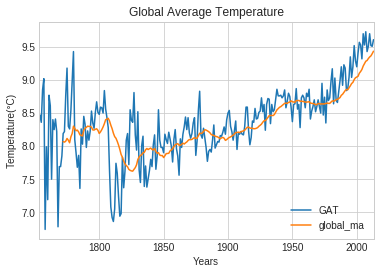

In [72]:
ax = df_all.plot(x='year', y=['GAT', 'global_ma'])
ax.set_ylabel("Temperature in C");
plt.xlabel ("Years")
plt.ylabel ("Temperature(°C)" )
plt.title ("Global Average Temperature")
plt.show();

## Visualization for Athens

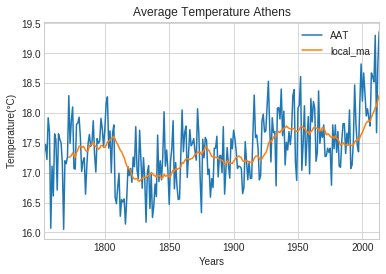

In [96]:
ax = df_all.plot(x='year', y=['AAT', 'local_ma'])
ax.set_ylabel("Temperature in C");
plt.xlabel ("Years")
plt.ylabel ("Temperature(°C)" )
plt.title ("Average Temperature Athens")
plt.show();

## Local temperature of Athens, Greece in accordance with the global temperature data and compared.

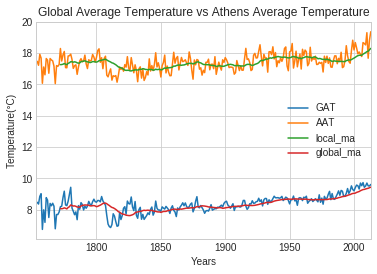

In [77]:
ax = df_all.plot(x='year', y=['GAT', 'AAT', 'local_ma', 'global_ma'])
ax.set_ylabel("Temperature in C");
plt.xlabel ("Years")
plt.ylabel ("Temperature(°C)" )
plt.title ("Global Average Temperature vs Athens Average Temperature")
plt.show();

## Correlation
We can also compute the Pearson's correlation. 
<br>We will compute it for all time and for the last 20 years.

In [78]:
print("Pearson correlation all our data:", df_all['GAT'].corr(df_all['AAT']))
print("Pearson correlation within 20 years:", df_all['GAT'].rolling(20).mean().corr(df_all['AAT'].rolling(20).mean()))

Pearson correlation all our data: 0.713221404675748
Pearson correlation within 20 years: 0.9067773160748105


In [79]:
df_diff = df_all['AAT'] - df_all['GAT']
print("The mean of the difference between Athens temp and global temp is ", df_diff.mean() )

The mean of the difference between Athens temp and global temp is  9.05249042145594


We can make a calculation in order to find the difference between the average global temperature and Athens.
As we can see, the mean of the difference between Athens temp and global temp is  9 degrees, so it's clear now that Athens is hotter that other Countries.

### Observations

Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
“How do the changes in your city’s temperatures over time compare to the changes in the global average?”
What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

* Athens is definitely a hot city and we can see clearly from our research that is hotter than other cities. Summers in Athens are extremely hot with very high temperatures. Overall trend of Athens averages shows that Athens is much hotter than world averages. This difference has been consistent over time. With the scatterplot that we made in the beggining is obvious that Athens had always been a hot city. However we can see that is matching with changes in the global averages. We can expand our research by analysing more cities of the word and it would be intersting if we analyse a cold city like Moscow and compare it to Greece.
* Word is definitely getting hotter every year and the trend can be best visualized by comparing each year’s average temperature with the long-term average. Overall trends looks like world is consistently getting hotter over the last few hundred years. Word's max average temperature was 9.83(°C) on 2015
(°C) on 2015. We found that by analysing our dataset with the global temperature. Highest Athens average temperature was 19.36(°C) on 2013. On the other hand, word's lowest average temperature was 5.78(°C) on year 1752 which is a long time ago. Athens lowest average temperature was 16.05(°C) on year 1768. 
* Both most hot temperature average observations were during last 10 years, confirms the hypothesis that the temperature has been increasing the last 100 years. Lowest Athens average temperature (16.05) was during 1768 and word's lowest average year (5.78) was during year 1752. Both observations were made on the first rows of our datasets.